In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
USER_CHOICES = np.random.choice([0, 1, 2], p=[0.3, 0.4, 0.3], size=1000)

In [3]:
start = []
p_start = [1/3] * 3

moves = ['R', 'P', 'S']
probs = [1/3] * 3
emission_matrix = np.array([[1/3] * 3] * 3)
rewards = [[0, -1, 1], [1, 0, -1], [-1, 1, 0]]

previous_moves = []

GAMES = 10
ALPHAS = [0.1, 0.01, 0.001, 0.0001]

scores = []

def choose_next_move(moves, emission_matrix, previous_moves):
    if not previous_moves:
        return np.random.choice(moves)
    return np.random.choice(moves, p=emission_matrix[previous_moves[-1]])


for i, alpha in enumerate(ALPHAS):
    score = [0]
    for user_choice in USER_CHOICES:
    #     user_choice = moves.index(input("Your move (R, P, S): "))
        computer_choice = moves.index(choose_next_move(moves, emission_matrix, previous_moves))
#         print(f"Computer's move: {moves[computer_choice]}")

        reward = rewards[computer_choice][user_choice]
#         if reward == 1:
#             print("You win")
#         elif reward == -1:
#             print("You lose")
#         else:
#             print("Draw")

        # modify matrix
        if emission_matrix[user_choice][computer_choice] + reward * alpha > 0:
            emission_matrix[user_choice][computer_choice] += reward * alpha
            emission_matrix[user_choice] /= np.sum(emission_matrix[user_choice])
        previous_moves.append(user_choice)
        score.append(score[-1] + reward)

#         print(emission_matrix)
#         print()
#     print(len(score))
    scores.append(score)



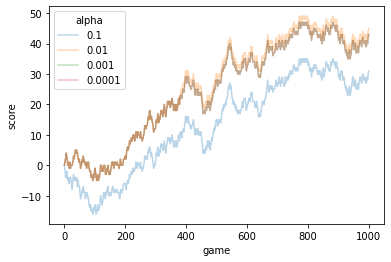

In [4]:
for score, alpha in zip(scores, ALPHAS):
    plt.plot(range(len(score)), score, label=alpha, alpha=0.3)
plt.legend(title="alpha")
plt.ylabel("score")
plt.xlabel("game")
plt.show()
